In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sacc

In [3]:
s = sacc.Sacc.load_fits('data/cls_DESY1.fits')

In [4]:
s.tracers.keys()

dict_keys(['DESgc__0', 'DESgc__1', 'DESgc__2', 'DESgc__3', 'DESgc__4', 'DESwl__0', 'DESwl__1', 'DESwl__2', 'DESwl__3'])

In [26]:
s.get_data_types()

['cl_00', 'cl_0e', 'cl_0b', 'cl_ee', 'cl_eb', 'cl_be', 'cl_bb']

Let's examine the different tracers.

We start by plotting the 5 galaxy clustering (redmagic) redshift bins:

In [100]:
np.trapz(s.tracers['DESgc__0'].nz, s.tracers['DESgc__0'].z)

1.0000000000000002

In [101]:
max(s.tracers['DESgc__0'].z)

3.9951000000000003

In [102]:
max(s.tracers['DESwl__0'].z)

3.9951000000000003

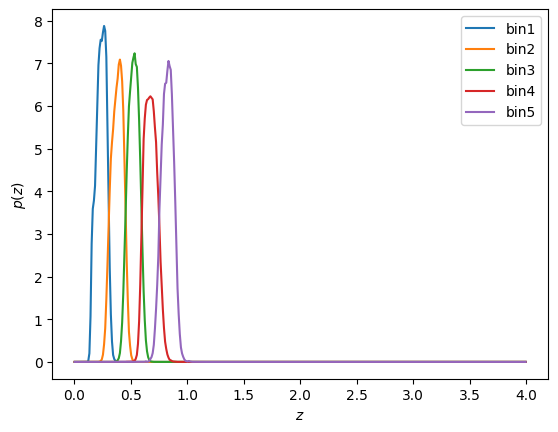

In [3]:
for i in range(5):
    nm = f'DESgc__{i}'
    t = s.tracers[nm]
    plt.plot(t.z, t.nz, '-', label=f'bin{i+1}')
plt.xlabel('$z$')
plt.ylabel('$p(z)$')
plt.legend();

Now we do the same for the weak lensing bins

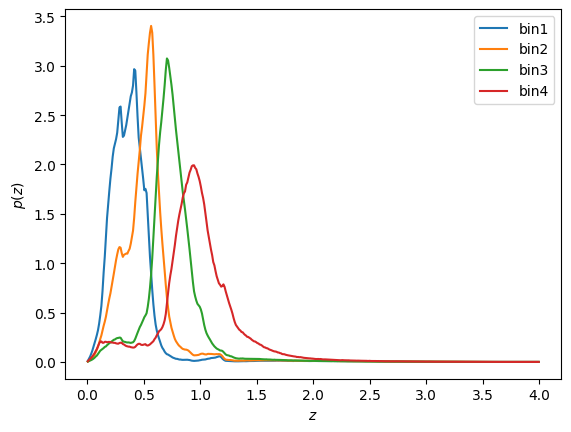

In [4]:
for i in range(4):
    nm = f'DESwl__{i}'
    t = s.tracers[nm]
    plt.plot(t.z, t.nz, '-', label=f'bin{i+1}')
plt.xlabel('$z$')
plt.ylabel('$p(z)$')
plt.legend();

Let's impose some scale cuts. In Carlos' paper we used the following:

In [5]:
# First we remove all B-modes
s.remove_selection(data_type='cl_bb')
s.remove_selection(data_type='cl_be')
s.remove_selection(data_type='cl_eb')
s.remove_selection(data_type='cl_0b')

In [27]:
# Now impose scale cuts for galaxy clustering and galaxy-galaxy lensing
# Maximum multipole for the 5 different galaxy redshift bins
lmaxs = [145, 225, 298, 371, 435]

for i, lmax in enumerate(lmaxs):
    tname = f'DESgc__{i}'
    # Remove from galaxy clustering
    s.remove_selection(data_type='cl_00', tracers=(tname, tname), ell__gt=lmax)
    # Remove from galaxy-galaxy lensing
    for j in range(4):
        t2 = f'DESwl__{j}'
        s.remove_selection(data_type='cl_0e', tracers=(tname, t2), ell__gt=lmax)

Now let's access the actual power spectra

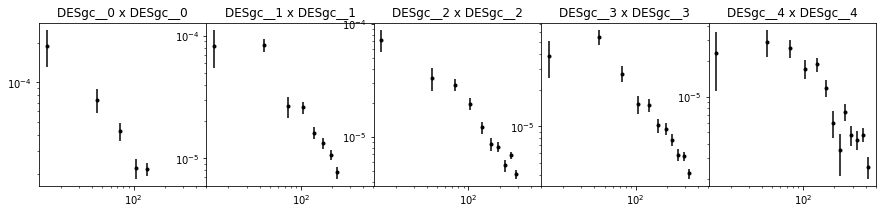

In [34]:
##### Finally, this is how you you can access individual C_ells:
# 1. Galaxy-galaxy

fig, axes = plt.subplots(1, 5,
                         figsize=(15, 3),
                         sharex=True)
plt.subplots_adjust(wspace=0)
for i in range(5):
    tn = f'DESgc__{i}'
    ell, cl, cov, ind = s.get_ell_cl('cl_00', tn, tn, return_cov=True, return_ind=True)
    axes[i].set_title(f'{tn} x {tn}')
    axes[i].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='k.')
    axes[i].loglog()

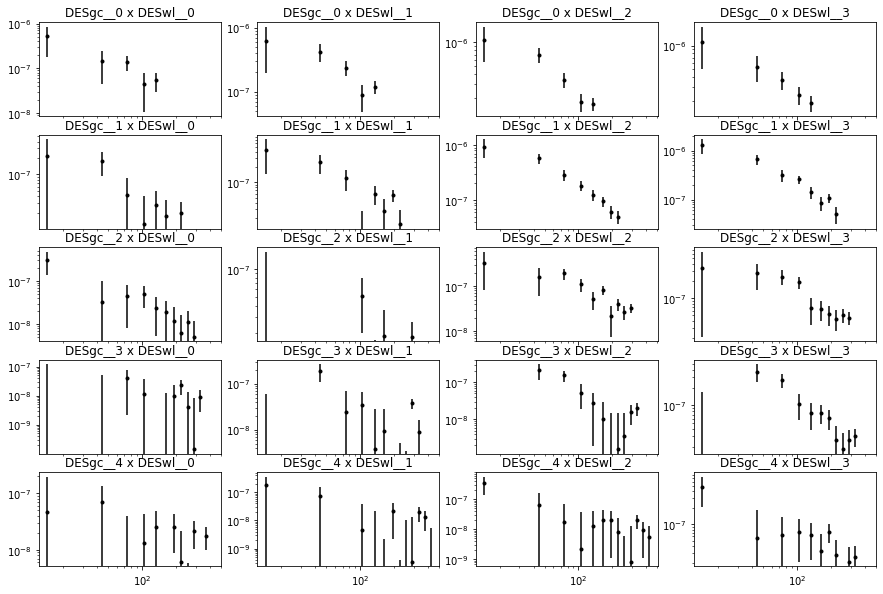

In [35]:
# 2. Galaxy-shear
fig, axes = plt.subplots(5, 4,
                         figsize=(15, 10),
                         sharex=True)
for i in range(5):
    tn = f'DESgc__{i}'
    for j in range(4):
        t2 = f'DESwl__{j}'
        ell, cl, cov, ind = s.get_ell_cl('cl_0e', tn, t2, return_cov=True, return_ind=True)
        ax = axes[i, j]
        ax.set_title(f'{tn} x {t2}')
        ax.errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='k.')
        ax.loglog()

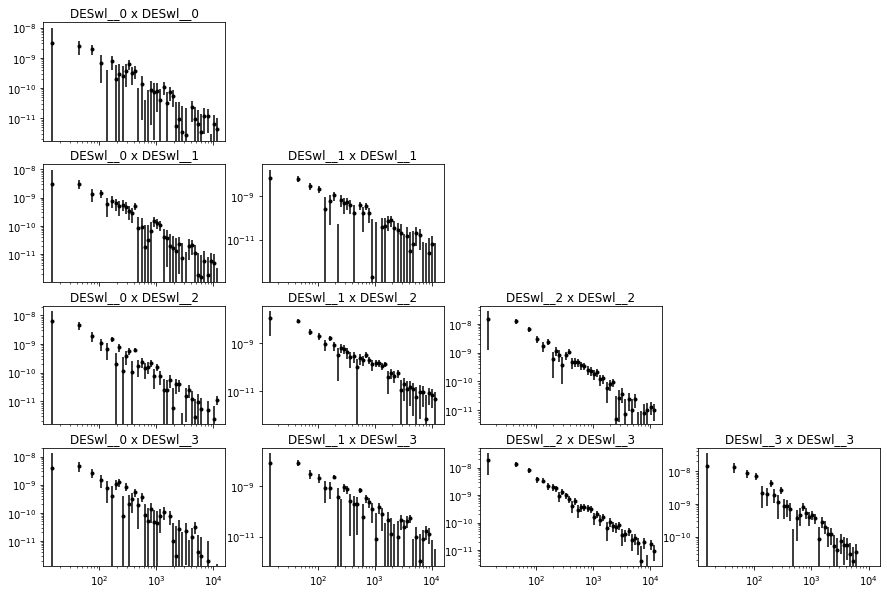

In [36]:
# 3. Shear-shear
fig, axes = plt.subplots(4, 4,
                         figsize=(15, 10),
                         sharex=True)
for b1 in range(4) :
    for b2 in range(4) :
        if b2<b1 :
            axes[b2,b1].axis('off')
for i in range(4):
    tn = f'DESwl__{i}'
    for j in range(i, 4):
        t2 = f'DESwl__{j}'
        ell, cl, cov, ind = s.get_ell_cl('cl_ee', tn, t2, return_cov=True, return_ind=True)
        ax = axes[j, i]
        ax.set_title(f'{tn} x {t2}')
        ax.errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='k.')
        ax.loglog()

Finally, here's what you can do to get the covariance matrix in the right order.
The ordering we adopt here is:
- First all galaxy-galaxy auto-correlations
- Then galaxy-shear (with shear bin running faster)
- Finally, shear-shear

In [89]:
s.mean.shape

(2419,)

In [88]:
s.mean[indices].shape

(625,)

In [61]:
s.covariance.covmat.shape

(2419, 2419)

In [92]:
s.covariance.covmat[indices][:, indices].shape

(625, 625)

In [67]:
s.get_tracer_combinations()

[('DESgc__0', 'DESgc__0'),
 ('DESgc__1', 'DESgc__1'),
 ('DESgc__2', 'DESgc__2'),
 ('DESgc__3', 'DESgc__3'),
 ('DESgc__4', 'DESgc__4'),
 ('DESgc__0', 'DESwl__0'),
 ('DESgc__0', 'DESwl__1'),
 ('DESgc__0', 'DESwl__2'),
 ('DESgc__0', 'DESwl__3'),
 ('DESgc__1', 'DESwl__0'),
 ('DESgc__1', 'DESwl__1'),
 ('DESgc__1', 'DESwl__2'),
 ('DESgc__1', 'DESwl__3'),
 ('DESgc__2', 'DESwl__0'),
 ('DESgc__2', 'DESwl__1'),
 ('DESgc__2', 'DESwl__2'),
 ('DESgc__2', 'DESwl__3'),
 ('DESgc__3', 'DESwl__0'),
 ('DESgc__3', 'DESwl__1'),
 ('DESgc__3', 'DESwl__2'),
 ('DESgc__3', 'DESwl__3'),
 ('DESgc__4', 'DESwl__0'),
 ('DESgc__4', 'DESwl__1'),
 ('DESgc__4', 'DESwl__2'),
 ('DESgc__4', 'DESwl__3'),
 ('DESwl__0', 'DESwl__0'),
 ('DESwl__0', 'DESwl__1'),
 ('DESwl__0', 'DESwl__2'),
 ('DESwl__0', 'DESwl__3'),
 ('DESwl__1', 'DESwl__1'),
 ('DESwl__1', 'DESwl__2'),
 ('DESwl__1', 'DESwl__3'),
 ('DESwl__2', 'DESwl__2'),
 ('DESwl__2', 'DESwl__3'),
 ('DESwl__3', 'DESwl__3')]

In [ ]:
# dtype = self.get_dtype_for_trs(tr1, tr2)
# ind = self.scovG.indices(data_type=dtype, tracers=(tr1, tr2))
# w = self.scovG.get_bandpower_windows(ind)

In [93]:
idx = s.indices(data_type='cl_00', tracers=('DESgc__0', 'DESgc__0'))

In [94]:
window = s.get_bandpower_windows(idx)

In [96]:
window.values

array([    0,     1,     2, ..., 12285, 12286, 12287])

In [97]:
window.weight

array([[ 5.71758683e-03, -4.74878508e-04,  1.83721622e-05,
        -9.99031154e-06, -2.69914564e-06],
       [ 1.59931787e-02, -1.32319968e-03,  5.20784438e-05,
        -2.74345944e-05, -7.36802849e-06],
       [ 2.35783639e-02, -1.93588116e-03,  7.86659365e-05,
        -3.89816231e-05, -1.03461734e-05],
       ...,
       [-4.72067700e-07, -1.16519973e-06, -1.14730666e-06,
        -1.18770323e-06, -1.19025826e-06],
       [-3.86339326e-07, -8.96341672e-07, -8.78803575e-07,
        -9.13163980e-07, -9.17019147e-07],
       [-2.76328461e-07, -5.56173238e-07, -5.44320670e-07,
        -5.72858665e-07, -5.78630120e-07]])

In [51]:
indices = []
# g-g
for i in range(5):
    tn = f'DESgc__{i}'
    _, _, ind = s.get_ell_cl('cl_00', tn, tn, return_cov=False, return_ind=True)
    indices += list(ind)
    print(f'Galaxy-Galaxy: {i} - {len(ind)} data points')
    
print('-'*50)
# g-s
for i in range(5):
    t1 = f'DESgc__{i}'
    for j in range(4):
        t2 = f'DESwl__{j}'
        _, _, ind = s.get_ell_cl('cl_0e', t1, t2, return_cov=False, return_ind=True)
        indices += list(ind)
        print(f'Galaxy-Shear: {i, j} - {len(ind)} data points')
        
print('-'*50)
# s-s
for i in range(4):
    t1 = f'DESwl__{i}'
    for j in range(i, 4):
        t2 = f'DESwl__{j}'
        _, _, ind = s.get_ell_cl('cl_ee', t1, t2, return_cov=False, return_ind=True)
        indices += list(ind)
        print(f'Shear-Shear: {i, j} - {len(ind)} data points')

indices = np.array(indices)

# This gets you the full covariance
cov = s.covariance.covmat

# And this puts it in the right order
cov = cov[indices][:, indices]

Galaxy-Galaxy: 0 - 5 data points
Galaxy-Galaxy: 1 - 8 data points
Galaxy-Galaxy: 2 - 10 data points
Galaxy-Galaxy: 3 - 11 data points
Galaxy-Galaxy: 4 - 13 data points
--------------------------------------------------
Galaxy-Shear: (0, 0) - 5 data points
Galaxy-Shear: (0, 1) - 5 data points
Galaxy-Shear: (0, 2) - 5 data points
Galaxy-Shear: (0, 3) - 5 data points
Galaxy-Shear: (1, 0) - 8 data points
Galaxy-Shear: (1, 1) - 8 data points
Galaxy-Shear: (1, 2) - 8 data points
Galaxy-Shear: (1, 3) - 8 data points
Galaxy-Shear: (2, 0) - 10 data points
Galaxy-Shear: (2, 1) - 10 data points
Galaxy-Shear: (2, 2) - 10 data points
Galaxy-Shear: (2, 3) - 10 data points
Galaxy-Shear: (3, 0) - 11 data points
Galaxy-Shear: (3, 1) - 11 data points
Galaxy-Shear: (3, 2) - 11 data points
Galaxy-Shear: (3, 3) - 11 data points
Galaxy-Shear: (4, 0) - 13 data points
Galaxy-Shear: (4, 1) - 13 data points
Galaxy-Shear: (4, 2) - 13 data points
Galaxy-Shear: (4, 3) - 13 data points
-----------------------------

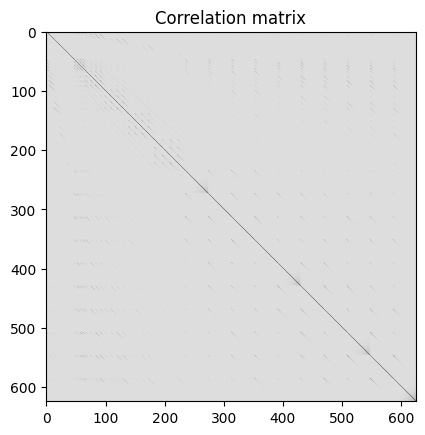

In [11]:
plt.title('Correlation matrix')
plt.imshow(cov/np.sqrt(np.outer(np.diag(cov), np.diag(cov))), cmap='Greys')